In [1]:
#!pip install pingouin


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import pingouin as pg

# importer les 3 tables :

In [3]:
chemin='C:\\Users\\nassc\\Desktop\\'
data_products2 = pd.read_csv(chemin+'data_products2.csv')
data_trans_clients = pd.read_csv(chemin+'data_trans_clients.csv')
data_trans_prod = pd.read_csv(chemin+'data_trans_prod.csv')

C:\Users\nassc\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
data_trans_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  336816 non-null  int64 
 1   id_prod     336816 non-null  object
 2   date        336816 non-null  object
 3   session_id  336816 non-null  object
 4   client_id   336816 non-null  object
 5   sex         336816 non-null  object
 6   birth       336816 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 18.0+ MB


In [5]:
data_trans_clients['date'] = pd.to_datetime(data_trans_clients['date'], format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [6]:
data_trans_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  336816 non-null  int64         
 1   id_prod     336816 non-null  object        
 2   date        336816 non-null  datetime64[ns]
 3   session_id  336816 non-null  object        
 4   client_id   336816 non-null  object        
 5   sex         336816 non-null  object        
 6   birth       336816 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 18.0+ MB


# Mission 2

# créer une colonne age :

In [7]:
data_trans_clients['age']=(data_trans_clients['date'].dt.year)-(data_trans_clients['birth'])

In [8]:
data_trans_clients

,Unnamed: 0,id_prod,date,session_id,client_id,sex,birth,age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,44
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,22
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,42
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,58
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,41
...,...,...,...,...,...,...,...,...
336811,336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,52
336812,336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,30
336813,336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,53
336814,336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,27


In [9]:
data_trans_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  336816 non-null  int64         
 1   id_prod     336816 non-null  object        
 2   date        336816 non-null  datetime64[ns]
 3   session_id  336816 non-null  object        
 4   client_id   336816 non-null  object        
 5   sex         336816 non-null  object        
 6   birth       336816 non-null  int64         
 7   age         336816 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 20.6+ MB


In [10]:
len(data_trans_clients['client_id'].unique())

8600

#  I ) Mesures de tendance centrale et de dispersion

# A) Age clients

In [11]:
data_trans_clients['age'].describe()

count    336816.000000
mean         43.351426
std          13.532093
min          17.000000
25%          34.000000
50%          42.000000
75%          51.000000
max          93.000000
Name: age, dtype: float64

In [12]:
data_age3=data_trans_clients[['client_id','age']].drop_duplicates('client_id')

In [13]:
data_age3

,client_id,age
0,c_4450,44
1,c_277,22
2,c_4270,42
3,c_4597,58
4,c_1242,41
...,...,...
311784,c_6837,26
312771,c_4540,18
316917,c_5139,21
320283,c_4679,91


In [14]:
data_age3['age'].describe()

count    8600.000000
mean       42.920698
std        16.912765
min        17.000000
25%        29.000000
50%        42.000000
75%        55.000000
max        93.000000
Name: age, dtype: float64

In [15]:
data_age3['age'].var()

286.0416229577819

In [16]:
data_age3['age'].mode()

0    17
dtype: int64

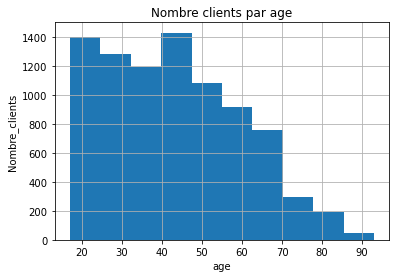

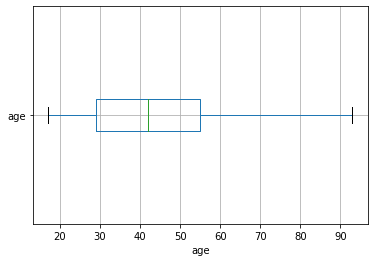

In [17]:

data_age3["age"].hist() # Crée l'histogramme
plt.xlabel('age')
plt.ylabel('Nombre_clients')
plt.title('Nombre clients par age')
plt.show() # Affiche l'histogramme
data_age3.boxplot(column="age", vert=False)
plt.xlabel('age')
plt.show()

# B) Sexe clients

# créer une table client : sexe

In [18]:
data_sexe=data_trans_clients[['client_id','sex']].drop_duplicates('client_id')

In [19]:
data_sexe

,client_id,sex
0,c_4450,f
1,c_277,f
2,c_4270,f
3,c_4597,m
4,c_1242,f
...,...,...
311784,c_6837,f
312771,c_4540,m
316917,c_5139,f
320283,c_4679,f


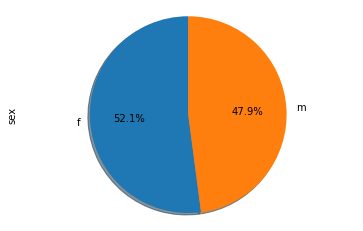

In [20]:
data_sexe['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=90,)
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# B) Prix des produits:

moy:
 21.86008518405836
med:
 13.06
var:
 890.5080879757087
std:
 29.84138213916555
skw:
 3.7990617419940786
kur:
 17.953269894996126


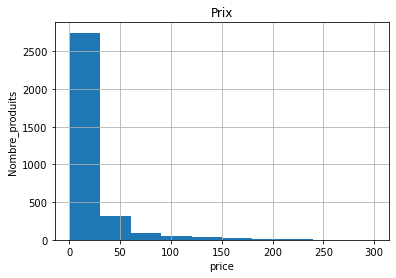

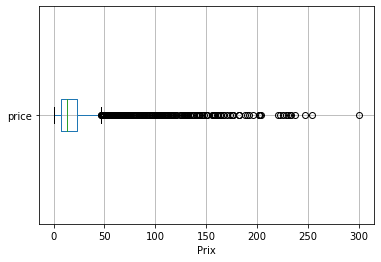

In [21]:
print("moy:\n",data_products2['price'].mean())
print("med:\n",data_products2['price'].median())
print("var:\n",data_products2['price'].var(ddof=0))
print("std:\n",data_products2['price'].std(ddof=0))
print("skw:\n",data_products2['price'].skew())
print("kur:\n",data_products2['price'].kurtosis())
data_products2["price"].hist() # Crée l'histogramme
plt.xlabel('price')
plt.ylabel('Nombre_produits')
plt.title('Prix')
plt.show() # Affiche l'histogramme
data_products2.boxplot(column="price", vert=False)
plt.xlabel('Prix')
plt.show()

#  II) Analyse de concentration :

# Courbe de Lorenz: Montant d'achats par client 

# La table clients,produits et transactions

In [22]:
data_trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336816 non-null  int64  
 1   id_prod     336816 non-null  object 
 2   date        336816 non-null  object 
 3   session_id  336816 non-null  object 
 4   client_id   336816 non-null  object 
 5   price       336816 non-null  float64
 6   categ       336816 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.0+ MB


In [23]:
data_trans_prod['date'] = pd.to_datetime(data_trans_prod['date'], format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [24]:
data_trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  336816 non-null  int64         
 1   id_prod     336816 non-null  object        
 2   date        336816 non-null  datetime64[ns]
 3   session_id  336816 non-null  object        
 4   client_id   336816 non-null  object        
 5   price       336816 non-null  float64       
 6   categ       336816 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 18.0+ MB


In [25]:
data_trans_prod_client1=data_trans_clients[['id_prod','date','session_id','client_id','sex','age']].merge(data_trans_prod[['id_prod','date','session_id','client_id','price','categ']],how='left',on=['id_prod','client_id','date','session_id'])

In [26]:
data_trans_prod_client1.reset_index()

,index,id_prod,date,session_id,client_id,sex,age,price,categ
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,44,4.99,0
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,22,65.75,2
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,42,10.71,1
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,58,4.20,0
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,41,8.99,0
...,...,...,...,...,...,...,...,...,...
336811,336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,52,31.99,1
336812,336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,30,22.99,0
336813,336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,53,11.03,0
336814,336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,27,50.99,2


In [27]:
data_trans_prod_client1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   sex         336816 non-null  object        
 5   age         336816 non-null  int64         
 6   price       336816 non-null  float64       
 7   categ       336816 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 23.1+ MB


In [28]:
len(data_trans_prod_client1['client_id'].unique())

8600

In [29]:
data_montantacha_client1=data_trans_prod_client1[['client_id','price']].groupby('client_id').sum().reset_index()

In [30]:
data_montantacha_client1.rename(columns={'price':'montant total achat1'},inplace=True)

In [31]:
data_montantacha_client1

,client_id,montant total achat1
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


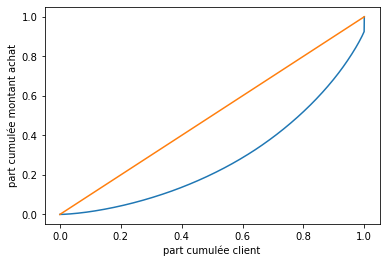

In [32]:
#courbe de lorenz:
price=data_montantacha_client1['montant total achat1']
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz)
plt.plot((0,1),(0,1))
plt.xlabel('part cumulée client')
plt.ylabel('part cumulée montant achat')
plt.show()

In [33]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.4398978594911832

# Le point d'inflexion sur la courbe de Lorenz à identifier : 

In [34]:
data_montantacha_client1['montant total achat1'].describe()

count      8600.000000
mean        674.144271
std        2565.983727
min           4.150000
25%         275.765000
50%         501.310000
75%         870.897500
max      162007.340000
Name: montant total achat1, dtype: float64

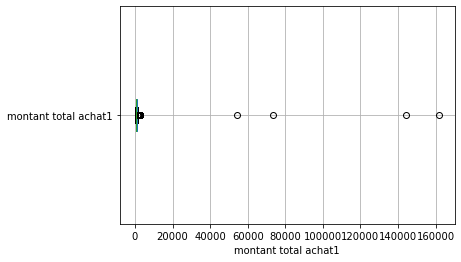

In [35]:
data_montantacha_client1.boxplot(column="montant total achat1", vert=False)
plt.xlabel('montant total achat1')
plt.show()

In [36]:
data_montantacha_client1.sort_values('montant total achat1')

,client_id,montant total achat1
7918,c_8140,4.15
7889,c_8114,4.99
750,c_1675,5.57
8480,c_890,6.08
8151,c_8351,6.31
...,...,...
7715,c_7959,2564.25
2724,c_3454,54463.56
6337,c_6714,73217.98
4388,c_4958,144257.21


# Reponse : 4 clients (c_3454,c_6714,c_4958,c_1609) ont un montant d'achats aberrant. Supprimons ces clients:


In [37]:
#supprimer les clients ayant des montant achat aberrant :
data_trans_prod_client=data_trans_prod_client1[data_trans_prod_client1['client_id']!='c_3454']

In [38]:
data_trans_prod_client=data_trans_prod_client[data_trans_prod_client['client_id']!='c_6714']

In [39]:
data_trans_prod_client=data_trans_prod_client[data_trans_prod_client['client_id']!='c_4958']

In [40]:
data_trans_prod_client=data_trans_prod_client[data_trans_prod_client['client_id']!='c_1609']

In [41]:
data_trans_prod_client

,id_prod,date,session_id,client_id,sex,age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,44,4.99,0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,22,65.75,2
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,42,10.71,1
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,58,4.20,0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,41,8.99,0
...,...,...,...,...,...,...,...,...
336809,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607,m,71,11.99,0
336810,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,32,23.37,1
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,30,22.99,0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,53,11.03,0


In [42]:
data_montantacha_client=data_trans_prod_client[['client_id','price']].groupby('client_id').sum().reset_index()

In [43]:
data_montantacha_client.rename(columns={'price':'montant total achat'},inplace=True)

In [44]:
data_montantacha_client

,client_id,montant total achat
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8591,c_995,119.08
8592,c_996,739.60
8593,c_997,572.89
8594,c_998,1527.69


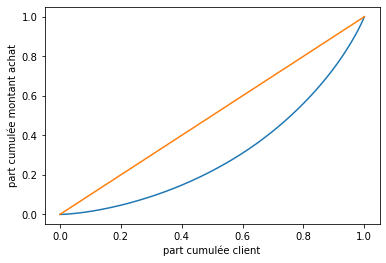

In [45]:
#courbe de lorenz:
price=data_montantacha_client['montant total achat']
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz)
plt.plot((0,1),(0,1))
plt.xlabel('part cumulée client')
plt.ylabel('part cumulée montant achat')
plt.show()

In [46]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.39525173898280086

# Réponse : indice gini etant faible il y'a une faible inégalité

# III) Analyse bivariée

# A) age et sexe clients

In [47]:
data_age_sexe=data_trans_clients[['client_id','age','sex']].drop_duplicates('client_id')

In [48]:
data_age_sexe

,client_id,age,sex
0,c_4450,44,f
1,c_277,22,f
2,c_4270,42,f
3,c_4597,58,m
4,c_1242,41,f
...,...,...,...
311784,c_6837,26,f
312771,c_4540,18,m
316917,c_5139,21,f
320283,c_4679,91,f


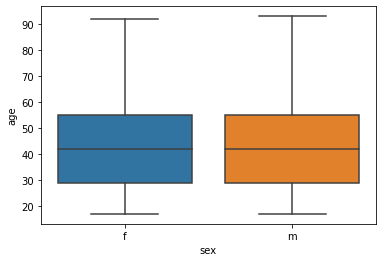

In [49]:
sns.boxplot(x=data_age_sexe['sex'],y=data_age_sexe['age'])#faire de meme pour prixcatégories


# B) Produits et prix

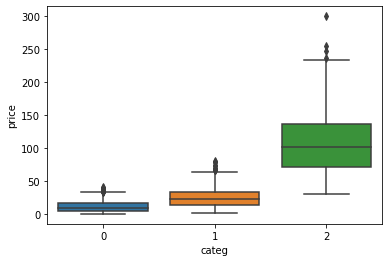

In [50]:
sns.boxplot(x=data_products2['categ'],y=data_products2['price'])

# C) courbe chiffre d'affaires par mois

In [51]:
data_trans_ven=data_trans_prod[['date','price']].groupby(pd.Grouper(key='date', freq='1M')).sum()

In [52]:
data_trans_ven.reset_index()

,date,price
0,2021-03-31,479404.91
1,2021-04-30,473125.20
2,2021-05-31,489450.51
3,2021-06-30,481330.18
4,2021-07-31,480939.94
5,2021-08-31,479398.07
6,2021-09-30,502895.12
7,2021-10-31,319232.20
8,2021-11-30,512993.37
9,2021-12-31,523009.92


Text(0.5, 1.0, 'CA par mois')

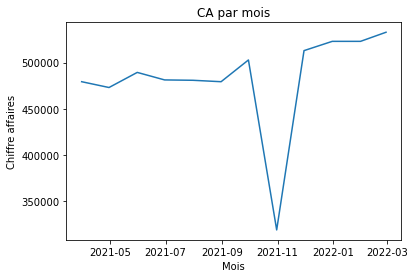

In [53]:
#tracer une courbe des ventes par mois:
plt.plot( data_trans_ven['price'])
plt.xlabel('Mois')
plt.ylabel('Chiffre affaires')
plt.title('CA par mois')

# Les ventes au mois d'octobre

In [54]:
# créer une table chiffre d'affaires par jour :
data_trans_ven_da=data_trans_prod[['date','price', "categ"]].groupby(["categ",pd.Grouper(key='date', freq='1D')]).sum()
data_trans_ven_da = data_trans_ven_da.reset_index(level="categ")
data_trans_ven_da.reset_index()

,date,categ,price
0,2021-03-01,0,6269.98
1,2021-03-02,0,6725.60
2,2021-03-03,0,6112.06
3,2021-03-04,0,5888.49
4,2021-03-05,0,5969.99
...,...,...,...
1064,2022-02-24,2,6642.57
1065,2022-02-25,2,5346.81
1066,2022-02-26,2,5256.15
1067,2022-02-27,2,5125.63


In [55]:
data_trans_ven_da1=data_trans_ven_da.reset_index()

In [56]:
#selectionner les ventes mois d'octobre :
data_trans_ven_da2=data_trans_ven_da1.loc[(data_trans_ven_da1['date']>='2021-10-01') & (data_trans_ven_da1['date'] <'2021-10-31'),['date','categ','price']]

In [57]:
data_trans_ven_da2

,date,categ,price
214,2021-10-01,0,6947.51
215,2021-10-02,0,7138.02
216,2021-10-03,0,6783.58
217,2021-10-04,0,6551.25
218,2021-10-05,0,6357.91
...,...,...,...
943,2021-10-26,2,2539.79
944,2021-10-27,2,3967.29
945,2021-10-28,2,2602.82
946,2021-10-29,2,3617.88


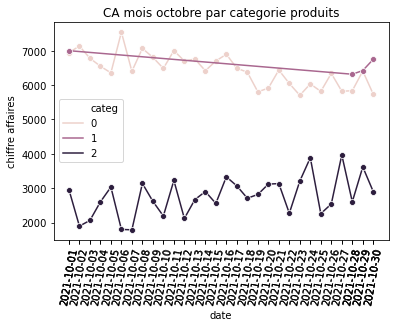

In [58]:

sns.lineplot(x=data_trans_ven_da2['date'],y=data_trans_ven_da2['price'],hue=data_trans_ven_da2['categ'], marker='o',linestyle='dashed')
#plt.xlabel('date')
plt.ylabel('chiffre affaires')
plt.title('CA mois octobre par categorie produits')
#for tick in 'date'.get_xticklabels():
    #tick.set_rotation(45)

#for tick in data_trans_ven_da2['date']:
    #tick.set_rotation(45)
xtick=data_trans_ven_da2['date']
plt.xticks(xtick,rotation=80)
#xtick.set_rotation(45)
plt.show()

# Mission 3 : Etude des corrélations :

# 1) Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?



# La table sexe et catégorie produits

In [59]:
data_trans_sex_categ=data_trans_prod_client[['sex','categ']]

In [60]:
data_trans_sex_categ

,sex,categ
0,f,0
1,f,2
2,f,1
3,m,0
4,f,0
...,...,...
336809,m,0
336810,f,1
336812,m,0
336813,f,0


In [61]:
X = "sex"
Y = "categ"

cont = data_trans_prod_client[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


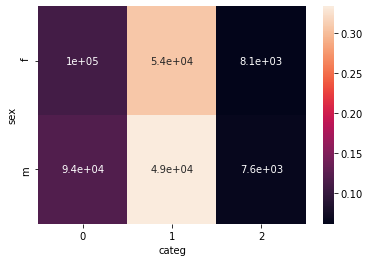

In [62]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_trans_prod_client)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()


In [63]:
print(pd.crosstab(data_trans_sex_categ['sex'],data_trans_sex_categ['categ']))


categ       0      1     2
sex                       
f      101206  53774  8122
m       94064  48851  7634


In [64]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_trans_prod_client)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n


In [65]:
table

categ,0,1,2,Total
sex,,,,
f,0.110333,0.308298,0.061358,0.0
m,0.119533,0.334005,0.066474,0.0
Total,0.000000,0.000000,0.000000,0.0


# Reponse : Les valeurs de contribution étant faible , les deux variables sont faiblement corrélées

# 2) correlation age client et montant total achat

# Table age ,prix

In [66]:

data_trans_client=data_trans_prod_client[['age','price']].groupby('age').sum()


In [67]:
data_trans_client=data_trans_client.reset_index()

In [68]:
data_trans_client

,age,price
0,17,240669.91
1,18,127250.03
2,19,90586.54
3,20,83495.81
4,21,80124.87
...,...,...
72,89,2887.61
73,90,1664.94
74,91,1809.92
75,92,1332.17


In [69]:
data_trans_client=data_trans_client.rename(columns={'price':'montant total achat'})

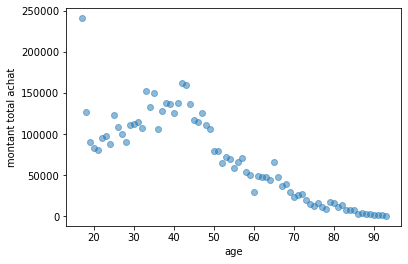

In [70]:

plt.plot(data_trans_client['age'],data_trans_client['montant total achat'],'o',alpha=0.5)
plt.xlabel('age')
plt.ylabel('montant total achat')
plt.show()

In [71]:
data_trans_client.corr()
#Y = data_trans_client['price']
#X = data_trans_client['age']
#data_trans_client.corr(Y,X )

,age,montant total achat
age,1.000000,-0.863887
montant total achat,-0.863887,1.000000


In [72]:
pg.corr(data_trans_client['age'],data_trans_client['montant total achat'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,-0.863887,"[-0.91, -0.79]",0.746301,0.739445,4.858857e-24,8.222e+20,1.0


In [73]:
import scipy.stats as st


print(st.pearsonr(data_trans_client["age"],data_trans_client['montant total achat'])[0])


-0.8638873857585163


# Reponse l'age et le montant d'achats sont inversement corrélés

In [74]:
data_trans_client1=data_trans_client[data_trans_client['age']!=17]

In [75]:
data_trans_client1.reset_index()

,index,age,montant total achat
0,1,18,127250.03
1,2,19,90586.54
2,3,20,83495.81
3,4,21,80124.87
4,5,22,95675.97
...,...,...,...
71,72,89,2887.61
72,73,90,1664.94
73,74,91,1809.92
74,75,92,1332.17


In [76]:
data_trans_client1.corr()

,age,montant total achat
age,1.00000,-0.86937
montant total achat,-0.86937,1.00000


In [77]:
pg.corr(data_trans_client1['age'],data_trans_client1['montant total achat'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,-0.86937,"[-0.92, -0.8]",0.755803,0.749113,2.350670e-24,1.649e+21,1.0


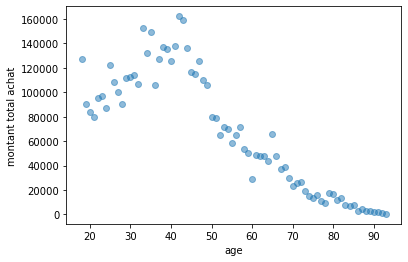

In [78]:
plt.plot(data_trans_client1['age'],data_trans_client1['montant total achat'],'o',alpha=0.5)
plt.xlabel('age')
plt.ylabel('montant total achat')
plt.show()

# Etude par tranche d'age

In [79]:
data_trans_client['catage']=np.nan

In [80]:
data_trans_client

,age,montant total achat,catage
0,17,240669.91,NaN
1,18,127250.03,NaN
2,19,90586.54,NaN
3,20,83495.81,NaN
4,21,80124.87,NaN
...,...,...,...
72,89,2887.61,NaN
73,90,1664.94,NaN
74,91,1809.92,NaN
75,92,1332.17,NaN


In [81]:
data_trans_client.loc[(data_trans_client['age']<=40),'catage']='< 40 ans'#,inplace=True

In [82]:
data_trans_client

,age,montant total achat,catage
0,17,240669.91,< 40 ans
1,18,127250.03,< 40 ans
2,19,90586.54,< 40 ans
3,20,83495.81,< 40 ans
4,21,80124.87,< 40 ans
...,...,...,...
72,89,2887.61,NaN
73,90,1664.94,NaN
74,91,1809.92,NaN
75,92,1332.17,NaN


In [83]:
data_trans_client['catage'].fillna('>40 ans', inplace = True)

In [84]:
data_trans_client

,age,montant total achat,catage
0,17,240669.91,< 40 ans
1,18,127250.03,< 40 ans
2,19,90586.54,< 40 ans
3,20,83495.81,< 40 ans
4,21,80124.87,< 40 ans
...,...,...,...
72,89,2887.61,>40 ans
73,90,1664.94,>40 ans
74,91,1809.92,>40 ans
75,92,1332.17,>40 ans


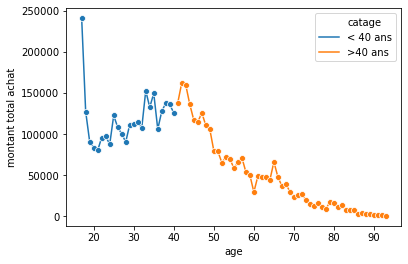

In [85]:
sns.lineplot(x=data_trans_client['age'],y=data_trans_client['montant total achat'],hue=data_trans_client['catage'], marker='o',linestyle='dashed')
#set_xticklabels(rotation=45))

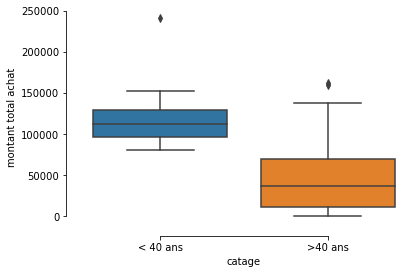

In [86]:
sns.boxplot(x='catage', y='montant total achat',
            
            data=data_trans_client)#showfliers=False)

sns.despine(offset=10, trim=True)

In [87]:
data_trans_client1['catage']=np.nan

<ipython-input-87-13755348a3d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trans_client1['catage']=np.nan


In [88]:
data_trans_client1.loc[(data_trans_client1['age']<=40),'catage']='< 40 ans'#,inplace=True

C:\Users\nassc\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
data_trans_client1['catage'].fillna('>40 ans', inplace = True)

C:\Users\nassc\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [90]:
data_trans_client1

,age,montant total achat,catage
1,18,127250.03,< 40 ans
2,19,90586.54,< 40 ans
3,20,83495.81,< 40 ans
4,21,80124.87,< 40 ans
5,22,95675.97,< 40 ans
...,...,...,...
72,89,2887.61,>40 ans
73,90,1664.94,>40 ans
74,91,1809.92,>40 ans
75,92,1332.17,>40 ans


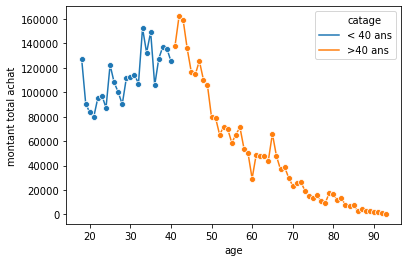

In [91]:
sns.lineplot(x=data_trans_client1['age'],y=data_trans_client1['montant total achat'],hue=data_trans_client1['catage'], marker='o',linestyle='dashed')
#set_xticklabels(rotation=45))

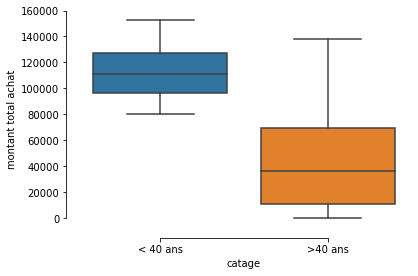

In [92]:
sns.boxplot(x='catage', y='montant total achat',
            
            data=data_trans_client1,showfliers=False)

sns.despine(offset=10, trim=True)

# 3) correlation age client et fréquence d'achat(par mois)




# Table Nombre achat par mois par client :

In [93]:
data_trans_prod_client_M=data_trans_prod_client[['date','client_id','age','session_id']].groupby([pd.Grouper(key='date', freq='1M'),'client_id','age']).count()


In [94]:
data_trans_prod_client_M1=data_trans_prod_client_M.reset_index()

In [95]:
data_trans_prod_client_M1

,date,client_id,age,session_id
0,2021-03-31,c_10,65,1
1,2021-03-31,c_1000,55,9
2,2021-03-31,c_1001,39,6
3,2021-03-31,c_1003,39,11
4,2021-03-31,c_1004,48,7
...,...,...,...,...
67981,2022-02-28,c_990,38,5
67982,2022-02-28,c_994,20,1
67983,2022-02-28,c_996,52,2
67984,2022-02-28,c_998,21,2


In [96]:
data_trans_prod_client_M1=data_trans_prod_client_M1.rename(columns={'session_id':'Nombre achat par Mois'})

In [97]:
data_trans_prod_client_M1

,date,client_id,age,Nombre achat par Mois
0,2021-03-31,c_10,65,1
1,2021-03-31,c_1000,55,9
2,2021-03-31,c_1001,39,6
3,2021-03-31,c_1003,39,11
4,2021-03-31,c_1004,48,7
...,...,...,...,...
67981,2022-02-28,c_990,38,5
67982,2022-02-28,c_994,20,1
67983,2022-02-28,c_996,52,2
67984,2022-02-28,c_998,21,2


In [98]:
data1=data_trans_prod_client_M1.loc[(data_trans_prod_client_M1['age']==17)]

In [99]:
data1.mean()

age                      17.000000
Nombre achat par Mois     2.655466
dtype: float64

In [100]:
data2=data_trans_prod_client_M1.loc[(data_trans_prod_client_M1['age']==89)]

In [101]:
data2.mean()

age                      89.00
Nombre achat par Mois     3.54
dtype: float64

# Table fréquence achat par mois et par age :

In [102]:
data_trans_prod_client_Mmoy=data_trans_prod_client_M1[['age','Nombre achat par Mois']].groupby('age').mean()


In [103]:
data_trans_prod_client_Mmoy1=data_trans_prod_client_Mmoy.reset_index()

In [104]:
data_trans_prod_client_Mmoy1

,age,Nombre achat par Mois
0,17,2.655466
1,18,2.756245
2,19,2.663886
3,20,2.605598
4,21,2.778215
...,...,...
72,89,3.540000
73,90,2.714286
74,91,4.240000
75,92,2.931034


In [105]:
data_trans_prod_client_Mmoy1=data_trans_prod_client_Mmoy1.rename(columns={'Nombre achat par Mois':'frequence achat par mois'})

In [106]:
data_trans_prod_client_Mmoy1

,age,frequence achat par mois
0,17,2.655466
1,18,2.756245
2,19,2.663886
3,20,2.605598
4,21,2.778215
...,...,...
72,89,3.540000
73,90,2.714286
74,91,4.240000
75,92,2.931034


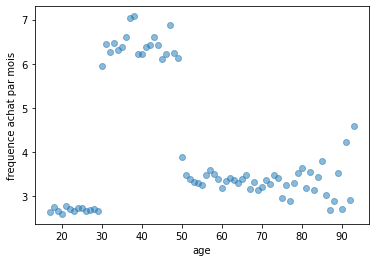

In [107]:
plt.plot(data_trans_prod_client_Mmoy1['age'],data_trans_prod_client_Mmoy1['frequence achat par mois'],'o',alpha=0.5)
plt.xlabel('age')
plt.ylabel('frequence achat par mois')
plt.show()

In [108]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(data_trans_prod_client_Mmoy1["age"],data_trans_prod_client_Mmoy1['frequence achat par mois'])[0])
print(np.cov(data_trans_prod_client_Mmoy1["age"],data_trans_prod_client_Mmoy1["frequence achat par mois"],ddof=0)[1,0])

-0.2730599059599409
-8.847670465947697


In [109]:
data_trans_prod_client_Mmoy1.corr()

,age,frequence achat par mois
age,1.00000,-0.27306
frequence achat par mois,-0.27306,1.00000


# Le coefficient de corrélation étant faibles les deux variables sont faiblement corrélées

# Etude par tranche d'age :



In [110]:
data_trans_prod_client_Mmoy1['catage']=np.nan

In [111]:
data_trans_prod_client_Mmoy1

,age,frequence achat par mois,catage
0,17,2.655466,NaN
1,18,2.756245,NaN
2,19,2.663886,NaN
3,20,2.605598,NaN
4,21,2.778215,NaN
...,...,...,...
72,89,3.540000,NaN
73,90,2.714286,NaN
74,91,4.240000,NaN
75,92,2.931034,NaN


In [112]:
data_trans_prod_client_Mmoy1.loc[(data_trans_prod_client_Mmoy1['age']<=30),'catage']='< 30 ans'

In [113]:
data_trans_prod_client_Mmoy1

,age,frequence achat par mois,catage
0,17,2.655466,< 30 ans
1,18,2.756245,< 30 ans
2,19,2.663886,< 30 ans
3,20,2.605598,< 30 ans
4,21,2.778215,< 30 ans
...,...,...,...
72,89,3.540000,NaN
73,90,2.714286,NaN
74,91,4.240000,NaN
75,92,2.931034,NaN


In [114]:
data_trans_prod_client_Mmoy1.loc[(data_trans_prod_client_Mmoy1['age']>30)&(data_trans_prod_client_Mmoy1['age']<=50),'catage']='30<age<50 ans'

In [115]:
data_trans_prod_client_Mmoy1

,age,frequence achat par mois,catage
0,17,2.655466,< 30 ans
1,18,2.756245,< 30 ans
2,19,2.663886,< 30 ans
3,20,2.605598,< 30 ans
4,21,2.778215,< 30 ans
...,...,...,...
72,89,3.540000,NaN
73,90,2.714286,NaN
74,91,4.240000,NaN
75,92,2.931034,NaN


In [116]:
data_trans_prod_client_Mmoy1['catage'].fillna('>50 ans', inplace = True)

In [117]:
data_trans_prod_client_Mmoy1

,age,frequence achat par mois,catage
0,17,2.655466,< 30 ans
1,18,2.756245,< 30 ans
2,19,2.663886,< 30 ans
3,20,2.605598,< 30 ans
4,21,2.778215,< 30 ans
...,...,...,...
72,89,3.540000,>50 ans
73,90,2.714286,>50 ans
74,91,4.240000,>50 ans
75,92,2.931034,>50 ans


In [118]:
data_trans_prod_client_Mmoy1[data_trans_prod_client_Mmoy1['age']==45]

,age,frequence achat par mois,catage
28,45,6.112314,30<age<50 ans


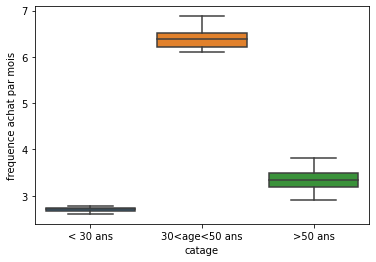

In [119]:
sns.boxplot(x='catage', y='frequence achat par mois',
            
            data=data_trans_prod_client_Mmoy1,showfliers=False)
#sns.despine(offset=10, trim=True)

In [120]:
X = "catage" # qualitative
Y = "frequence achat par mois" # quantitative

sous_echantillon = data_trans_prod_client_Mmoy1[['catage',"frequence achat par mois"]] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.8642307179922175

In [121]:
aov = pg.anova(data=data_trans_prod_client_Mmoy1[['frequence achat par mois','catage']], dv='frequence achat par mois', between='catage', detailed=True)
print(aov)


   Source          SS  DF         MS           F         p-unc       np2
0  catage  141.428026   2  70.714013  235.521144  8.197026e-33  0.864231
1  Within   22.218120  74   0.300245         NaN           NaN       NaN


# Reponse : Eta^2 = 0,86 , la corrélation est plus forte entre la tranche d'age et la fréquence des achats

# 4) Corrélation age client et nombre d'articles achetés

# Table age nombre d'articles achetés

In [122]:
data_trans_prod_age_an=data_trans_prod_client[['id_prod','age','session_id']].groupby(['age','session_id']).count()


In [123]:
data_trans_prod_age_an=data_trans_prod_age_an.reset_index()

In [124]:
data_trans_prod_age_an

,age,session_id,id_prod
0,17,s_100056,1
1,17,s_100057,1
2,17,s_100084,1
3,17,s_100087,1
4,17,s_100148,1
...,...,...,...
157806,93,s_161729,1
157807,93,s_163948,1
157808,93,s_164023,2
157809,93,s_168174,3


In [125]:
data_trans_prod_age_an1=data_trans_prod_age_an[['age','id_prod']].groupby('age').mean().reset_index()

In [126]:
data_trans_prod_age_an1

,age,id_prod
0,17,1.740675
1,18,1.758242
2,19,1.757075
3,20,1.728270
4,21,1.791032
...,...,...
72,89,1.552632
73,90,1.557377
74,91,1.766667
75,92,1.287879


In [127]:
data_trans_prod_age_an1['id_prod']

0     1.740675
1     1.758242
2     1.757075
3     1.728270
4     1.791032
        ...   
72    1.552632
73    1.557377
74    1.766667
75    1.287879
76    1.437500
Name: id_prod, Length: 77, dtype: float64

In [128]:
data_trans_prod_age_an2=data_trans_prod_age_an1.rename(columns={'id_prod':'Taille du panier moyen'})
#data_trans_client=data_trans_client.rename(columns={'price':'montant total achat'})

In [129]:
data_trans_prod_age_an2.reset_index()

,index,age,Taille du panier moyen
0,0,17,1.740675
1,1,18,1.758242
2,2,19,1.757075
3,3,20,1.728270
4,4,21,1.791032
...,...,...,...
72,72,89,1.552632
73,73,90,1.557377
74,74,91,1.766667
75,75,92,1.287879


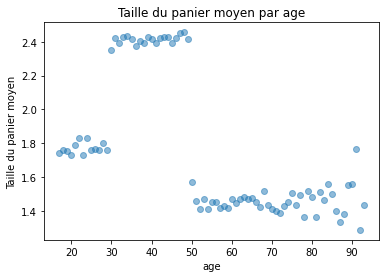

In [130]:
plt.plot(data_trans_prod_age_an2['age'],data_trans_prod_age_an2['Taille du panier moyen'],'o',alpha=0.5)
plt.xlabel('age')
plt.ylabel('Taille du panier moyen')
plt.title('Taille du panier moyen par age')
plt.show()

In [131]:
data_trans_prod_age_an2.corr()

,age,Taille du panier moyen
age,1.000000,-0.602451
Taille du panier moyen,-0.602451,1.000000


In [132]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(data_trans_prod_age_an2["age"],data_trans_prod_age_an2['Taille du panier moyen'])[0])


-0.6024508817715568


In [133]:
pg.corr(data_trans_prod_age_an2['age'],data_trans_prod_age_an2['Taille du panier moyen'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,-0.602451,"[-0.73, -0.44]",0.362947,0.345729,6.764235e-09,2.042e+06,0.999976


# Reponse :  R=-0,6 :les deux variables sont moyennement corrélées

# Etude par tranche d'age :

In [134]:
#Etude par tranche d'age boite moustache+ (anova pas oblige).SNS
data_trans_prod_age_an1['catage']=np.nan

In [135]:
data_trans_prod_age_an1

,age,id_prod,catage
0,17,1.740675,NaN
1,18,1.758242,NaN
2,19,1.757075,NaN
3,20,1.728270,NaN
4,21,1.791032,NaN
...,...,...,...
72,89,1.552632,NaN
73,90,1.557377,NaN
74,91,1.766667,NaN
75,92,1.287879,NaN


In [136]:
data_trans_prod_age_an1.loc[(data_trans_prod_age_an1['age']<=30),'catage']='< 30 ans'

In [137]:
data_trans_prod_age_an1

,age,id_prod,catage
0,17,1.740675,< 30 ans
1,18,1.758242,< 30 ans
2,19,1.757075,< 30 ans
3,20,1.728270,< 30 ans
4,21,1.791032,< 30 ans
...,...,...,...
72,89,1.552632,NaN
73,90,1.557377,NaN
74,91,1.766667,NaN
75,92,1.287879,NaN


In [138]:
data_trans_prod_age_an1.loc[(data_trans_prod_age_an1['age']>30)&(data_trans_prod_age_an1['age']<=50),'catage']='30<age<50 ans'

In [139]:
data_trans_prod_age_an1

,age,id_prod,catage
0,17,1.740675,< 30 ans
1,18,1.758242,< 30 ans
2,19,1.757075,< 30 ans
3,20,1.728270,< 30 ans
4,21,1.791032,< 30 ans
...,...,...,...
72,89,1.552632,NaN
73,90,1.557377,NaN
74,91,1.766667,NaN
75,92,1.287879,NaN


In [140]:
data_trans_prod_age_an1['catage'].fillna('>50 ans', inplace = True)

In [141]:
data_trans_prod_age_an1

,age,id_prod,catage
0,17,1.740675,< 30 ans
1,18,1.758242,< 30 ans
2,19,1.757075,< 30 ans
3,20,1.728270,< 30 ans
4,21,1.791032,< 30 ans
...,...,...,...
72,89,1.552632,>50 ans
73,90,1.557377,>50 ans
74,91,1.766667,>50 ans
75,92,1.287879,>50 ans


In [142]:
data_trans_prod_age_an1=data_trans_prod_age_an1.rename(columns={'id_prod':'Taille du panier moyen'})

In [143]:
data_trans_prod_age_an1.reset_index()

,index,age,Taille du panier moyen,catage
0,0,17,1.740675,< 30 ans
1,1,18,1.758242,< 30 ans
2,2,19,1.757075,< 30 ans
3,3,20,1.728270,< 30 ans
4,4,21,1.791032,< 30 ans
...,...,...,...,...
72,72,89,1.552632,>50 ans
73,73,90,1.557377,>50 ans
74,74,91,1.766667,>50 ans
75,75,92,1.287879,>50 ans


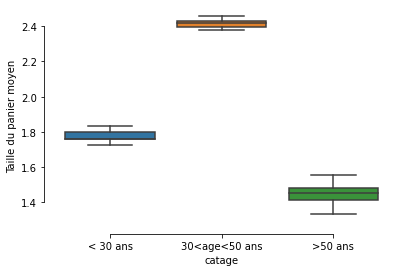

In [144]:
sns.boxplot(x='catage', y='Taille du panier moyen',
            
            data=data_trans_prod_age_an1,showfliers=False,)
sns.despine(offset=10, trim=True)

In [145]:
X = "catage" # qualitative
Y = "Taille du panier moyen" # quantitative

sous_echantillon = data_trans_prod_age_an1[['catage',"Taille du panier moyen"]] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.9029822178281293

# Reponse : eta^2 =0,9 , par tranche d'age les deux variables sont corrélées

# 5) Correlation age et categories produits:

# La table age et catégorie produits

In [146]:
data_trans_categ_age_an=data_trans_prod_client[['id_prod','categ','age']].groupby(['age','categ']).count()


In [147]:
data_trans_categ_age_an=data_trans_categ_age_an.reset_index()

In [148]:
data_trans_categ_age_an

,age,categ,id_prod
0,17,0,1396
1,17,1,2150
2,17,2,2381
3,18,0,682
4,18,1,1249
...,...,...,...
223,92,0,35
224,92,1,49
225,92,2,1
226,93,0,6


In [149]:
data_trans_categ_age_an=data_trans_categ_age_an.rename(columns={'id_prod':'NombreAchat'})

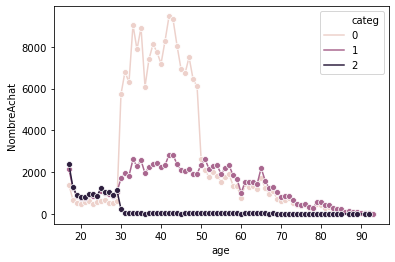

In [150]:
sns.lineplot(x=data_trans_categ_age_an['age'],y=data_trans_categ_age_an['NombreAchat'],hue=data_trans_categ_age_an['categ'], marker='o',linestyle='dashed')
#set_xticklabels(rotation=45))

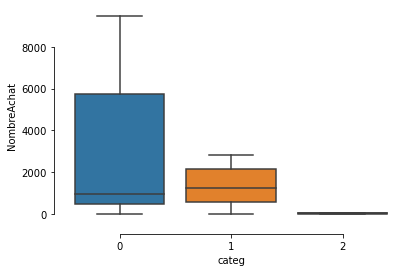

In [151]:
sns.boxplot(x='categ', y='NombreAchat',
            
            data=data_trans_categ_age_an,showfliers=False)
sns.despine(offset=10, trim=True)

In [152]:
data_trans_prod_client[['age','categ']]

,age,categ
0,44,0
1,22,2
2,42,1
3,58,0
4,41,0
...,...,...
336809,71,0
336810,32,1
336812,30,0
336813,53,0


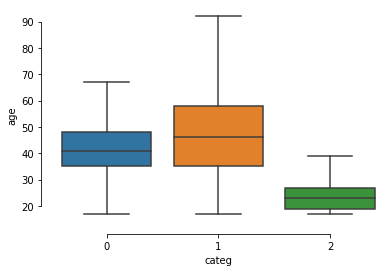

In [153]:
#faire representer boxplot par categorie et par agedata_trans_prod_client[['age','categ']]avec sns
#data_trans_prod_client.boxplot(column='age',by='categ')
sns.boxplot(x='categ', y='age',
            
            data=data_trans_prod_client[['age','categ']],showfliers=False)
sns.despine(offset=10, trim=True)


In [154]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = data_trans_prod_client[['age',"categ"]] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11307363719324781

# Reponse : eta^2 étant faible donc les deux variables sont faiblement corrélées